In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

font_name = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family=font_name)

file1_paths = [r"C:\Mtest\프로젝트1\서울공공자전거\이용정보_수정\서울특별시 공공자전거 이용정보(시간대별)_2301-2306.csv",
              r"C:\Mtest\프로젝트1\서울공공자전거\이용정보_수정\서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv",
              r"C:\Mtest\프로젝트1\서울공공자전거\이용정보_수정\서울특별시 공공자전거 이용정보(시간대별)_2401-2405.csv"]

# df1 = pd.read_csv(file_path, encoding='utf-8')

df1_list = []
for file in file1_paths:
    df = pd.read_csv(file, encoding='utf-8-sig')  # cp949로 인코딩 지정
    df1_list.append(df)

df1 = pd.concat(df1_list, ignore_index=True)



file2_paths = [r"C:\Mtest\프로젝트1\서울공공자전거\대여소정보\서울특별시 공공자전거 대여소별 이용정보(월별)_23.1-6.csv",
              r"C:\Mtest\프로젝트1\서울공공자전거\대여소정보\서울특별시 공공자전거 대여소별 이용정보(월별)_23.7-12.csv",
              r"C:\Mtest\프로젝트1\서울공공자전거\대여소정보\서울특별시 공공자전거 대여소별 이용정보(월별)_24.1-6.csv"]

df2_list = []
for file in file2_paths:
    df = pd.read_csv(file, encoding='cp949')  # cp949로 인코딩 지정
    df2_list.append(df)

df2 = pd.concat(df2_list, ignore_index=True)

df2 = df2.drop_duplicates(subset='대여소명')

df = pd.merge(df1, df2[['대여소명','자치구']], on='대여소명', how='left')
df.dropna(subset=['자치구'], inplace=True)

# 결과 확인 ok
print(df.head())
print(df.tail())

         대여일자  대여시간 대여구분코드  대여소번호               대여소명 성별 연령대코드  이용건수  이동거리(M)  \
0  2023-01-01     0    정기권    746      746. 목동2단지 상가  F  ~10대   1.0   310.00   
1  2023-01-01     0    정기권   2715  2715.마곡나루역 2번 출구   F  ~10대   1.0  2350.00   
2  2023-01-01     0    정기권   4560     4560. 양평동성원아파트  F  ~10대   1.0  1250.48   
3  2023-01-01     0    정기권    108       108. 서교동 사거리  F   20대   1.0  1550.00   
4  2023-01-01     0    정기권    731  731. 서울시 도로환경관리센터  F   20대   3.0  2596.08   

   이용시간(분)   자치구  
0     11.0   양천구  
1      7.0   강서구  
2      8.0  영등포구  
3     15.0   마포구  
4     32.0   양천구  
                대여일자  대여시간 대여구분코드  대여소번호              대여소명 성별 연령대코드  이용건수  \
37904167  2024-05-31    23    정기권   1901  1901. 신도림동주민센터 앞  M    기타   1.0   
37904168  2024-05-31    23    정기권   1212  1212. 송파역 2번 출구앞  M    기타   1.0   
37904169  2024-05-31    23    정기권   1407  1407. 먹골역 1번출구 뒤  M    기타   1.0   
37904170  2024-05-31    23    정기권   1414   1414. 사가정역 2번출구  M    기타   1.0   
37904171  2024-05-31

In [17]:
print(df.columns)
print(df['연령대코드'].unique())

Index(['대여일자', '대여시간', '대여구분코드', '대여소번호', '대여소명', '성별', '연령대코드', '이용건수',
       '이동거리(M)', '이용시간(분)', '자치구'],
      dtype='object')
['~10대' '20대' '30대' '40대' '50대' '60대' '70대이상' '기타']
2873


In [23]:
import pandas as pd

# 조건에 맞는 데이터 필터링
filtered_data = df[
    (df['대여시간'] == 18) &
    (df['대여소명'] == '2715.마곡나루역 2번 출구')
]

print(filtered_data)

# # 해당 조건의 개수 계산
# count = len(filtered_data)

# print(f"조건에 맞는 데이터의 개수: {count}")

Empty DataFrame
Columns: [대여일자, 대여시간, 대여구분코드, 대여소번호, 대여소명, 성별, 연령대코드, 이용건수, 이동거리(M), 이용시간(분), 자치구]
Index: []


In [3]:
# # 연령대별 총 이동거리1
# age_groups = df['연령대코드'].unique()

# def cal_avg_distance(df, age_group):
#     avg_distance_m = df[df['연령대코드'] == age_group]['이동거리(M)'].sum()
#     avg_distance_km = (avg_distance_m / 1000).round(2)
#     return avg_distance_km

# avg_distance_dict = {}

# for age_group in age_groups:
#     a =  cal_avg_distance(df, age_group)
#     avg_distance_dict[age_group] = a
#     print(f'{age_group} 총 이동거리: {a}km')

# 연령대별 총 이동거리1
total_distance_grouped = df.groupby('연령대코드')['이동거리(M)'].sum().reset_index()

total_distance_grouped['총 이동거리(KM)'] = (total_distance_grouped['이동거리(M)']//1000)

average_distance_grouped = df.groupby('연령대코드')['이동거리(M)'].mean().reset_index()

average_distance_grouped['평균 이동거리(KM)'] = (average_distance_grouped['이동거리(M)'] / 1000).round(2)

total_distance_grouped = pd.merge(total_distance_grouped, average_distance_grouped[['연령대코드', '평균 이동거리(KM)']], on='연령대코드')

total_distance_grouped = total_distance_grouped.drop('이동거리(M)',axis=1)

print(total_distance_grouped)

   연령대코드  총 이동거리(KM)  평균 이동거리(KM)
0    20대  28878492.0         2.72
1    30대  25151642.0         2.74
2    40대  17524314.0         2.88
3    50대  12585292.0         2.91
4    60대   4240685.0         2.85
5  70대이상    646283.0         2.72
6   ~10대   7184442.0         2.54
7     기타   7930156.0         2.54


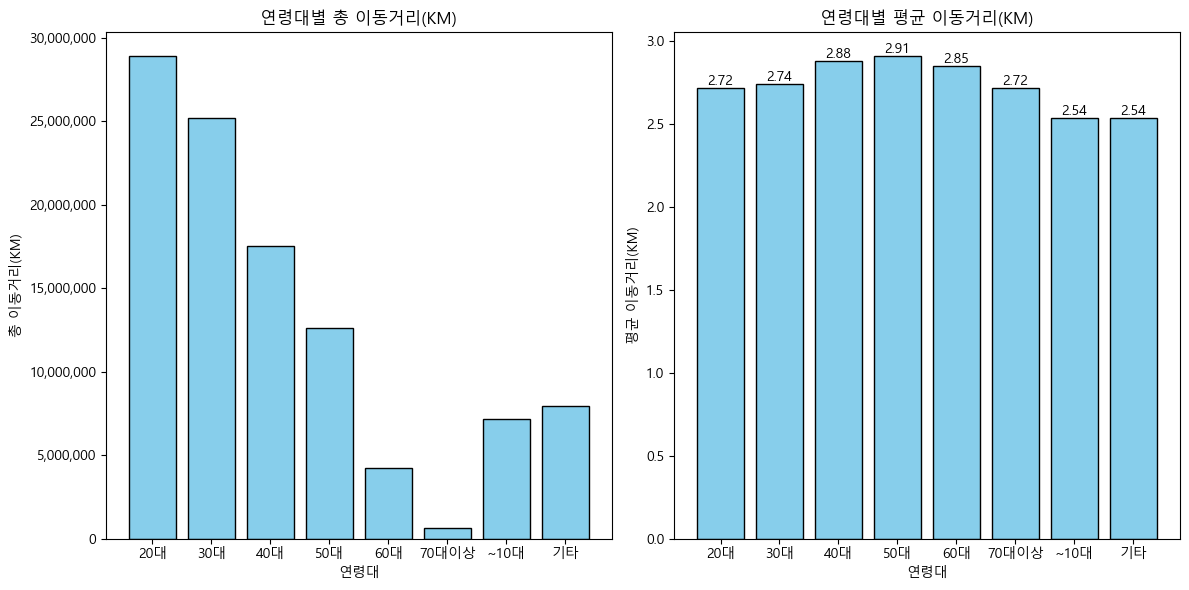

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 연령대별 총 이동거리 바차트
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1행 2열 서브플롯 생성

# 첫 번째 차트: 연령대코드별 총 이동거리(KM) 바 차트
bars1 = axes[0].bar(
    total_distance_grouped['연령대코드'], 
    total_distance_grouped['총 이동거리(KM)'], 
    color='skyblue', 
    edgecolor='black'  # 테두리 색상 설정
)
axes[0].set_title('연령대별 총 이동거리(KM)')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('총 이동거리(KM)')

# y축 포맷을 일반 숫자로 설정
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 두 번째 차트: 연령대코드별 평균 이동거리(KM) 바 차트
bars2 = axes[1].bar(
    total_distance_grouped['연령대코드'], 
    total_distance_grouped['평균 이동거리(KM)'], 
    color='skyblue', 
    edgecolor='black'  # 테두리 색상 설정
)
axes[1].set_title('연령대별 평균 이동거리(KM)')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('평균 이동거리(KM)')

# 각 바 위에 y값 표시
for bar in bars2:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,  # 바의 중심 위치
        height,                             # 바의 높이 값
        f'{height:.2f}',                    # 표시할 값 (소수점 2자리까지)
        ha='center',                        # 수평 정렬 (가운데)
        va='bottom'                         # 수직 정렬 (바의 위쪽)
    )

# 레이아웃 조정 및 차트 출력
plt.tight_layout()
plt.show()




In [11]:
# 연령대별 총 이용시간2
total_time_grouped = df.groupby('연령대코드')['이용시간(분)'].sum().reset_index()

total_time_grouped['총 이용시간(시간)'] = (total_time_grouped['이용시간(분)'] // 60)

average_time_grouped = df.groupby('연령대코드')['이용시간(분)'].mean().reset_index()

average_time_grouped['평균 이용시간(분)'] = (average_time_grouped['이용시간(분)']).round(2)

total_time_grouped = pd.merge(total_time_grouped, average_time_grouped[['연령대코드','평균 이용시간(분)']],on='연령대코드')

total_time_grouped = total_time_grouped.drop('이용시간(분)',axis=1)

print(total_time_grouped)

   연령대코드  총 이용시간(시간)  평균 이용시간(분)
0    20대   4040694.0       22.85
1    30대   3589651.0       23.43
2    40대   2559816.0       25.23
3    50대   1818020.0       25.25
4    60대    665368.0       26.87
5  70대이상    115208.0       29.06
6   ~10대   1041870.0       22.09
7     기타   1141720.0       21.93


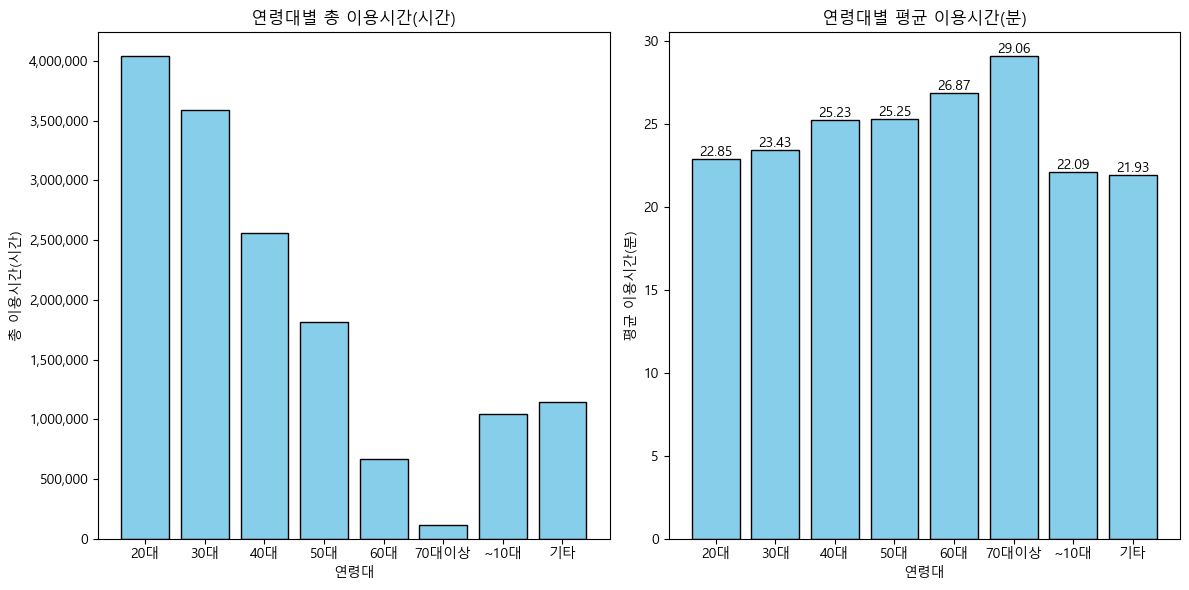

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 연령대별 총 이용시간 바차트
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1행 2열 서브플롯 생성

# 첫 번째 차트: 연령대코드별 총 이용시간(시간) 바 차트
axes[0].bar(
    total_time_grouped['연령대코드'], 
    total_time_grouped['총 이용시간(시간)'], 
    color='skyblue', 
    edgecolor='black'  # 테두리 색상 설정
)
axes[0].set_title('연령대별 총 이용시간(시간)')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('총 이용시간(시간)')

# y축 포맷을 일반 숫자로 설정
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 두 번째 차트: 연령대코드별 평균 이용시간(분) 바 차트
bars = axes[1].bar(
    total_time_grouped['연령대코드'], 
    total_time_grouped['평균 이용시간(분)'], 
    color='skyblue', 
    edgecolor='black'  # 테두리 색상 설정
)
axes[1].set_title('연령대별 평균 이용시간(분)')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('평균 이용시간(분)')

# 각 바 위에 y값 표시
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,  # 바의 중심 위치
        height,                             # 바의 높이 값
        f'{height:.2f}',                    # 표시할 값 (소수점 2자리까지)
        ha='center',                        # 수평 정렬 (가운데)
        va='bottom'                         # 수직 정렬 (바의 위쪽)
    )
    
# 레이아웃 조정 및 차트 출력
plt.tight_layout()
plt.show()



In [17]:
# "일일권"과 "일일권(비회원)"을 합친 새로운 카테고리 추가
df['대여구분코드_통합'] = df['대여구분코드'].replace({'일일권(비회원)': '일일권', '일일권': '일일권'})

In [19]:
# 연령대별 대여구분코드3
ticket_group_counts = df.groupby(['연령대코드', '대여구분코드_통합']).size().reset_index(name='빈도수')

# 각 연령대코드별로 전체 빈도수 계산
ticket_group_counts['연령대별총합'] = ticket_group_counts.groupby('연령대코드')['빈도수'].transform('sum')

ticket_group_counts['퍼센트'] = ((ticket_group_counts['빈도수'] / ticket_group_counts['연령대별총합']) * 100).round(2)

# '연령대별총합' 열은 퍼센트 계산 후 필요 없으니 제거 (선택사항)
ticket_group_counts = ticket_group_counts.drop(columns='연령대별총합')

print(ticket_group_counts)

    연령대코드 대여구분코드_통합      빈도수    퍼센트
0     20대       단체권     1772   0.02
1     20대       일일권  2520108  23.75
2     20대       정기권  8089910  76.24
3     30대       단체권      861   0.01
4     30대       일일권  1442616  15.69
5     30대       정기권  7748929  84.30
6     40대       단체권     2430   0.04
7     40대       일일권   658536  10.82
8     40대       정기권  5425955  89.14
9     50대       단체권      467   0.01
10    50대       일일권   290147   6.72
11    50대       정기권  4030188  93.27
12    60대       단체권       41   0.00
13    60대       일일권    70169   4.72
14    60대       정기권  1415505  95.27
15  70대이상       단체권       26   0.01
16  70대이상       일일권    12764   5.37
17  70대이상       정기권   225092  94.62
18   ~10대       단체권     3152   0.11
19   ~10대       일일권   853504  30.17
20   ~10대       정기권  1972752  69.72
21     기타       단체권      855   0.03
22     기타       일일권   523331  16.75
23     기타       정기권  2599332  83.22


In [21]:
ticket_result = pd.DataFrame()

for ticket_group in ticket_group_counts['연령대코드'].unique():
    ticket_top_3 = ticket_group_counts[ticket_group_counts['연령대코드'] == ticket_group].nlargest(2, '빈도수')
    ticket_result = pd.concat([ticket_result, ticket_top_3])

ticket_result.reset_index(drop=True, inplace=True)

print(ticket_result)

    연령대코드 대여구분코드_통합      빈도수    퍼센트
0     20대       정기권  8089910  76.24
1     20대       일일권  2520108  23.75
2     30대       정기권  7748929  84.30
3     30대       일일권  1442616  15.69
4     40대       정기권  5425955  89.14
5     40대       일일권   658536  10.82
6     50대       정기권  4030188  93.27
7     50대       일일권   290147   6.72
8     60대       정기권  1415505  95.27
9     60대       일일권    70169   4.72
10  70대이상       정기권   225092  94.62
11  70대이상       일일권    12764   5.37
12   ~10대       정기권  1972752  69.72
13   ~10대       일일권   853504  30.17
14     기타       정기권  2599332  83.22
15     기타       일일권   523331  16.75


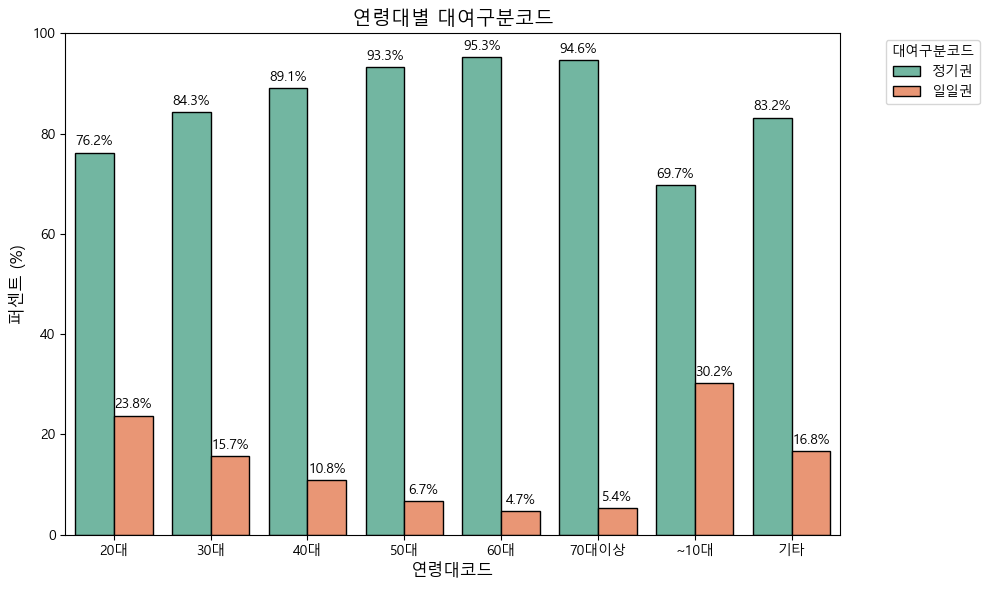

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 바 차트 생성 (테두리 추가)
ax = sns.barplot(
    x='연령대코드', 
    y='퍼센트', 
    hue='대여구분코드_통합', 
    data=ticket_result, 
    palette='Set2',
    edgecolor='black',  # 테두리 색상 설정
    linewidth=1          # 테두리 두께 설정
)

# 차트 타이틀과 축 레이블 설정
plt.title('연령대별 대여구분코드', fontsize=14)
plt.xlabel('연령대코드', fontsize=12)
plt.ylabel('퍼센트 (%)', fontsize=12)

# 바 위에 퍼센트 값 표시
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', label_type='edge', padding=3, fontsize=10, color='black')

# 범례 설정
plt.legend(title='대여구분코드', bbox_to_anchor=(1.05, 1), loc='upper left')

# 차트 표시
plt.tight_layout()
plt.show()


In [18]:
# 연령대별 대여코드3-2 요일별
df['대여일자'] = pd.to_datetime(df['대여일자'])

df['요일'] = df['대여일자'].dt.day_name()

# 연령대코드, 요일, 통합된 대여구분코드별로 빈도수 계산
ticket_group_counts = df.groupby(['연령대코드', '요일', '대여구분코드_통합']).size().reset_index(name='빈도수')

# 각 연령대코드, 요일별로 전체 빈도수 계산
ticket_group_counts['요일별총합'] = ticket_group_counts.groupby(['연령대코드', '요일'])['빈도수'].transform('sum')

# "일일권"에 해당하는 퍼센트 계산
ticket_group_counts['퍼센트'] = ((ticket_group_counts['빈도수'] / ticket_group_counts['요일별총합']) * 100).round(2)

# "일일권" 데이터만 필터링
filtered_ticket_group_counts = ticket_group_counts[ticket_group_counts['대여구분코드_통합'] == '일일권']

# 최종 데이터 확인
print(filtered_ticket_group_counts)

     연령대코드         요일 대여구분코드_통합     빈도수    요일별총합    퍼센트
1      20대     Friday       일일권  364461  1626006  22.41
4      20대     Monday       일일권  330248  1545403  21.37
7      20대   Saturday       일일권  440801  1411477  31.23
10     20대     Sunday       일일권  438409  1333316  32.88
13     20대   Thursday       일일권  319350  1573885  20.29
16     20대    Tuesday       일일권  311192  1551110  20.06
19     20대  Wednesday       일일권  315647  1570593  20.10
22     30대     Friday       일일권  202507  1447490  13.99
25     30대     Monday       일일권  180817  1359206  13.30
28     30대   Saturday       일일권  269130  1135228  23.71
31     30대     Sunday       일일권  270340  1039691  26.00
34     30대   Thursday       일일권  173179  1410523  12.28
37     30대    Tuesday       일일권  171749  1392824  12.33
40     30대  Wednesday       일일권  174894  1407444  12.43
43     40대     Friday       일일권   87158   986555   8.83
46     40대     Monday       일일권   77062   905236   8.51
49     40대   Saturday       일일권  127212   697118

C:\Users\user\AppData\Local\Temp\ipykernel_13700\3042830411.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ticket_group_counts['요일'] = filtered_ticket_group_counts['요일'].str.capitalize()


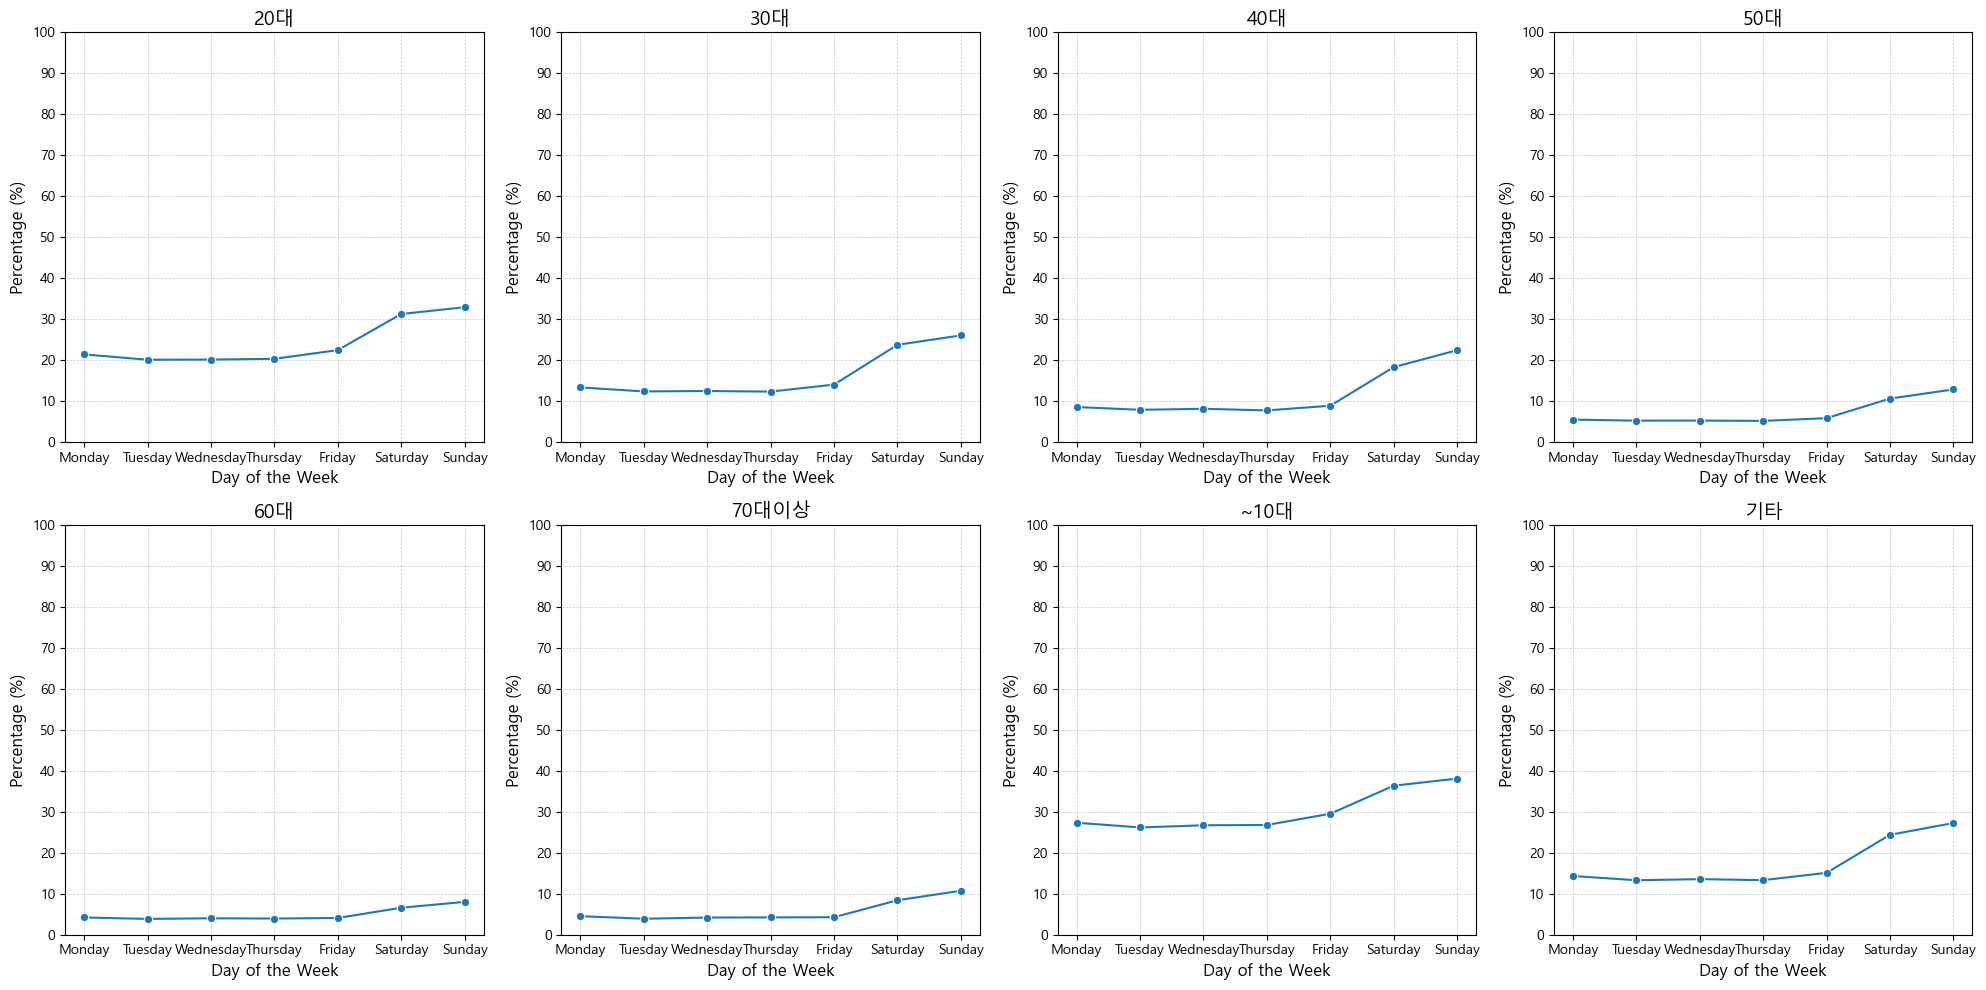

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 요일의 순서 정의 (capitalize로 첫 글자만 대문자)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일 컬럼을 모두 첫 글자만 대문자로 변환
filtered_ticket_group_counts['요일'] = filtered_ticket_group_counts['요일'].str.capitalize()

# 요일을 범주형 데이터로 변환하고 순서 지정
filtered_ticket_group_counts = filtered_ticket_group_counts.copy()
filtered_ticket_group_counts['요일'] = pd.Categorical(filtered_ticket_group_counts['요일'], categories=weekday_order, ordered=True)

# 연령대별로 그룹화된 서브플롯 설정
age_groups = filtered_ticket_group_counts['연령대코드'].unique()
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # 2x4 서브플롯
axes = axes.flatten()

# 각 연령대별로 서브플롯 생성
for i, age_group in enumerate(age_groups):
    subset = filtered_ticket_group_counts[filtered_ticket_group_counts['연령대코드'] == age_group]
    
    # 선형 차트
    sns.lineplot(x='요일', y='퍼센트', data=subset, ax=axes[i], marker='o')
    
    # y축 범위 설정 및 제목, 레이블 추가
    axes[i].set_ylim(0, 100)
    axes[i].set_title(f'{age_group}', fontsize=14)
    axes[i].set_xlabel('Day of the Week', fontsize=12)
    axes[i].set_ylabel('Percentage (%)', fontsize=12)
    
    # y축을 10단위로 변경
    axes[i].set_yticks(range(0, 101, 10))

    # 그리드 추가 (옅은 선)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()  # 간격 조정
plt.show()



In [20]:
# 연령대별 성별4
gen_group_counts = df.groupby(['연령대코드', '성별']).size().reset_index(name='빈도수')

# 각 연령대코드별로 전체 빈도수 계산
gen_group_counts['연령대별총합'] = gen_group_counts.groupby('연령대코드')['빈도수'].transform('sum')

gen_group_counts['퍼센트'] = ((gen_group_counts['빈도수'] / gen_group_counts['연령대별총합']) * 100).round(2)

# '연령대별총합' 열은 퍼센트 계산 후 필요 없으니 제거 (선택사항)
gen_group_counts = gen_group_counts.drop(columns='연령대별총합')

print(gen_group_counts)

    연령대코드 성별      빈도수    퍼센트
0     20대  F  4646756  43.79
1     20대  M  5965034  56.21
2     30대  F  3593954  39.10
3     30대  M  5598452  60.90
4     40대  F  2146501  35.26
5     40대  M  3940420  64.74
6     50대  F  1515925  35.08
7     50대  M  2804877  64.92
8     60대  F   359348  24.19
9     60대  M  1126367  75.81
10  70대이상  F    59911  25.19
11  70대이상  M   177971  74.81
12   ~10대  F   814375  28.78
13   ~10대  M  2015033  71.22
14     기타  F  1251981  40.08
15     기타  M  1871537  59.92


In [21]:
gen_result = pd.DataFrame()

for gen_group in gen_group_counts['연령대코드'].unique():
    gen_top_3 = gen_group_counts[gen_group_counts['연령대코드'] == gen_group].nlargest(2, '빈도수')
    gen_result = pd.concat([gen_result, gen_top_3])

gen_result.reset_index(drop=True, inplace=True)

print(gen_result)

    연령대코드 성별      빈도수    퍼센트
0     20대  M  5965034  56.21
1     20대  F  4646756  43.79
2     30대  M  5598452  60.90
3     30대  F  3593954  39.10
4     40대  M  3940420  64.74
5     40대  F  2146501  35.26
6     50대  M  2804877  64.92
7     50대  F  1515925  35.08
8     60대  M  1126367  75.81
9     60대  F   359348  24.19
10  70대이상  M   177971  74.81
11  70대이상  F    59911  25.19
12   ~10대  M  2015033  71.22
13   ~10대  F   814375  28.78
14     기타  M  1871537  59.92
15     기타  F  1251981  40.08


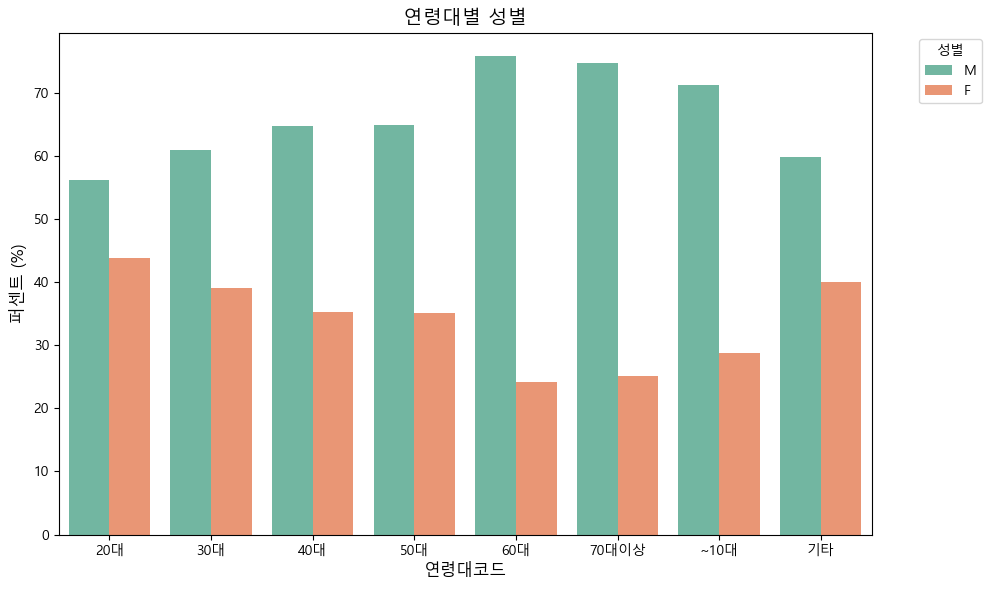

In [39]:
plt.figure(figsize=(10, 6))

# 각 연령대별로 다른 색상을 사용하기 위해 hue 인자를 이용
sns.barplot(x='연령대코드', y='퍼센트', hue='성별', data=gen_result, palette='Set2')

# 차트 타이틀과 축 레이블 설정
plt.title('연령대별 성별', fontsize=14)
plt.xlabel('연령대코드', fontsize=12)
plt.ylabel('퍼센트 (%)', fontsize=12)

for p in ax.containers:
    ax.bar_label(p,fmt='%.1f%%', label_type='edge', padding=3, fontsize=10, color='black')

# 범례 설정
plt.legend(title='성별',bbox_to_anchor=(1.05, 1), loc='upper left')

# 차트 표시
plt.tight_layout()
plt.show()

In [23]:
# 연령대별 대여시간5
time_group_counts = df.groupby(['연령대코드', '대여시간']).size().reset_index(name='빈도수')

# 각 연령대코드별로 전체 빈도수 계산
time_group_counts['연령대별총합'] = time_group_counts.groupby('연령대코드')['빈도수'].transform('sum')

time_group_counts['퍼센트'] = ((time_group_counts['빈도수'] / time_group_counts['연령대별총합']) * 100).round(2)

# '연령대별총합' 열은 퍼센트 계산 후 필요 없으니 제거 (선택사항)
time_group_counts = time_group_counts.drop(columns='연령대별총합')

print(time_group_counts)

    연령대코드  대여시간     빈도수   퍼센트
0     20대     0  307316  2.90
1     20대     1  200000  1.88
2     20대     2  127792  1.20
3     20대     3   79272  0.75
4     20대     4   54877  0.52
..    ...   ...     ...   ...
187    기타    19  207832  6.65
188    기타    20  175623  5.62
189    기타    21  160635  5.14
190    기타    22  136823  4.38
191    기타    23   86911  2.78

[192 rows x 4 columns]


       대여시간                       대여소명  이용빈도
0         0  1001. 광진교 남단 사거리(천호공원 방면)   394
1         0            1002. 해공공원(천호동)   530
2         0               1003. 해공도서관앞   250
3         0       1004. 삼성광나루아파트 버스정류장   361
4         0           1006. 롯데캐슬 115동앞    79
...     ...                        ...   ...
68721    23          993.은평뉴타운 은뜨락아파트앞    87
68722    23         994.북한산생태공원입구(교통섬)    85
68723    23               995.은평다목적체육관    53
68724    23         996.응암역2번출구 국민은행 앞  1574
68725    23                       AS센터     1

[68726 rows x 3 columns]


In [25]:
combined_counts = time_group_counts.groupby(['대여소명', '대여시간'])['빈도수'].sum().reset_index()
# 결과 출력
print(combined_counts)
# 빈도수가 가장 높은 행 찾기
max_count_row = combined_counts.loc[combined_counts['빈도수'].idxmax()]

# 결과 출력
print(max_count_row)


                            대여소명  대여시간  빈도수
0      1001. 광진교 남단 사거리(천호공원 방면)     0  394
1      1001. 광진교 남단 사거리(천호공원 방면)     1  438
2      1001. 광진교 남단 사거리(천호공원 방면)     2  283
3      1001. 광진교 남단 사거리(천호공원 방면)     3  232
4      1001. 광진교 남단 사거리(천호공원 방면)     4  160
...                          ...   ...  ...
68721                       AS센터    14    1
68722                       AS센터    15    2
68723                       AS센터    16    3
68724                       AS센터    18    1
68725                       AS센터    23    1

[68726 rows x 3 columns]
대여소명    2715.마곡나루역 2번 출구 
대여시간                   18
빈도수                  9803
Name: 29760, dtype: object


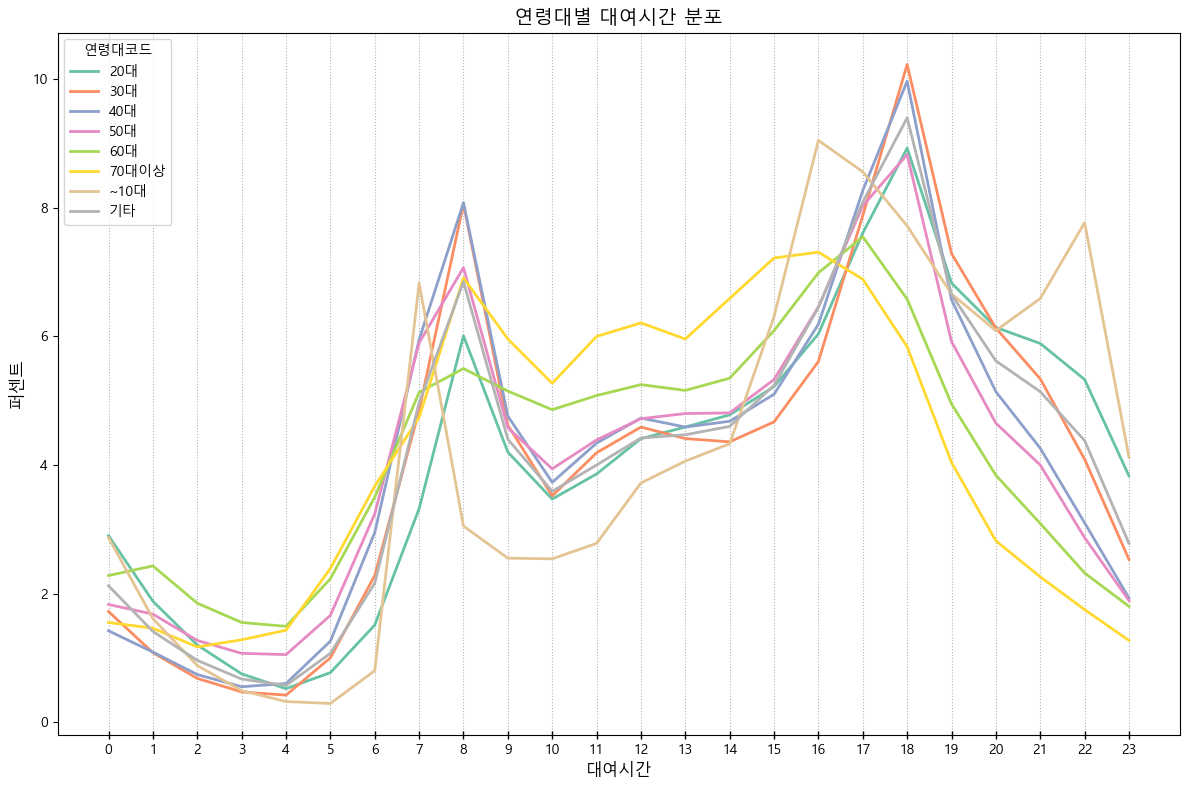

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 환경의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'Nanum Gothic'

# 그래프 크기 설정
plt.figure(figsize=(12, 8))  # 가로 12인치, 세로 8인치

# 예시 데이터
sns.lineplot(x='대여시간', y='퍼센트', data=time_group_counts, hue='연령대코드', palette='Set2', lw=2)

# 제목과 레이블 추가
plt.title('연령대별 대여시간 분포', fontsize=14)
plt.xlabel('대여시간', fontsize=12)
plt.ylabel('퍼센트', fontsize=12)

# x축 값들을 1단위로 설정
plt.xticks(range(min(time_group_counts['대여시간']), max(time_group_counts['대여시간']) + 1, 1))

# x축을 점선으로 설정
plt.gca().xaxis.set_tick_params(which='both', length=5, width=0.5, color='black', direction='inout', grid_color='gray', grid_alpha=0.5)

# x축 눈금선 스타일을 점선으로 설정
plt.gca().xaxis.set_tick_params(which='major', length=6, width=1.0, direction='inout', grid_alpha=0.5)
plt.grid(axis='x', linestyle=':', color='gray', alpha=0.6)  # x축에 점선 스타일 추가

# 그래프 출력
plt.tight_layout()
plt.show()


In [25]:
time_result = pd.DataFrame()

for time_group in time_group_counts['연령대코드'].unique():
    time_top_3 = time_group_counts[time_group_counts['연령대코드'] == time_group].nlargest(2, '빈도수')
    time_result = pd.concat([time_result, time_top_3])

time_result.reset_index(drop=True, inplace=True)

print(time_result)

    연령대코드  대여시간     빈도수    퍼센트
0     20대    18  947900   8.93
1     20대    17  807542   7.61
2     30대    18  940382  10.23
3     30대     8  740600   8.06
4     40대    18  606904   9.97
5     40대    17  503463   8.27
6     50대    18  381601   8.83
7     50대    17  346822   8.03
8     60대    17  112161   7.55
9     60대    16  103785   6.99
10  70대이상    16   17389   7.31
11  70대이상    15   17182   7.22
12   ~10대    16  256143   9.05
13   ~10대    17  242179   8.56
14     기타    18  293576   9.40
15     기타    17  252611   8.09


In [26]:
# 연령대별 대여일자6
date_group_counts = df.groupby(['연령대코드', '대여일자']).size().reset_index(name='빈도수')

# 각 연령대코드별로 전체 빈도수 계산
date_group_counts['연령대별총합'] = date_group_counts.groupby('연령대코드')['빈도수'].transform('sum')

date_group_counts['퍼센트'] = ((date_group_counts['빈도수'] / date_group_counts['연령대별총합']) * 100).round(2)

# '연령대별총합' 열은 퍼센트 계산 후 필요 없으니 제거 (선택사항)
date_group_counts = date_group_counts.drop(columns='연령대별총합')

print(date_group_counts)

     연령대코드       대여일자    빈도수   퍼센트
0      20대 2023-01-01   7153  0.07
1      20대 2023-01-02   9064  0.09
2      20대 2023-01-03   9678  0.09
3      20대 2023-01-04  10530  0.10
4      20대 2023-01-05  10697  0.10
...    ...        ...    ...   ...
4131    기타 2024-05-27   8434  0.27
4132    기타 2024-05-28   9126  0.29
4133    기타 2024-05-29   8763  0.28
4134    기타 2024-05-30   8773  0.28
4135    기타 2024-05-31   8697  0.28

[4136 rows x 4 columns]


In [27]:
date_result = pd.DataFrame()

for date_group in date_group_counts['연령대코드'].unique():
    date_top_3 = date_group_counts[date_group_counts['연령대코드'] == date_group].nlargest(2, '빈도수')
    date_result = pd.concat([date_result, date_top_3])

date_result.reset_index(drop=True, inplace=True)

print(date_result)

    연령대코드       대여일자    빈도수   퍼센트
0     20대 2023-09-22  36184  0.34
1     20대 2023-09-23  35609  0.34
2     30대 2024-05-28  30547  0.33
3     30대 2023-09-22  30280  0.33
4     40대 2024-05-28  20632  0.34
5     40대 2024-05-29  20575  0.34
6     50대 2024-05-28  15063  0.35
7     50대 2024-05-30  14937  0.35
8     60대 2024-05-29   5309  0.36
9     60대 2024-05-28   5261  0.35
10  70대이상 2024-05-24    923  0.39
11  70대이상 2024-05-29    902  0.38
12   ~10대 2023-09-23  10292  0.36
13   ~10대 2023-09-22  10135  0.36
14     기타 2023-09-22  10671  0.34
15     기타 2023-05-19  10548  0.34


In [28]:
# 연령대별 요일별 빈도수 계산
date_group_counts = df.groupby(['연령대코드', '요일']).size().reset_index(name='빈도수')

# 각 연령대코드별로 전체 빈도수 계산
date_group_counts['연령대별총합'] = date_group_counts.groupby('연령대코드')['빈도수'].transform('sum')

# 퍼센트 계산
date_group_counts['퍼센트'] = ((date_group_counts['빈도수'] / date_group_counts['연령대별총합']) * 100).round(2)

# '연령대별총합' 열은 퍼센트 계산 후 필요 없으니 제거 (선택사항)
date_group_counts = date_group_counts.drop(columns='연령대별총합')

# 요일을 순서대로 정렬하기 위한 순서 지정
date_group_counts['요일'] = pd.Categorical(date_group_counts['요일'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# 연령대별 요일 빈도수 높은 순으로 정렬
date_group_counts_sorted = date_group_counts.sort_values(by=['연령대코드', '빈도수'], ascending=[True, False])

# 결과 출력
print(date_group_counts_sorted)


    연령대코드         요일      빈도수    퍼센트
0     20대     Friday  1626006  15.32
4     20대   Thursday  1573885  14.83
6     20대  Wednesday  1570593  14.80
5     20대    Tuesday  1551110  14.62
1     20대     Monday  1545403  14.56
2     20대   Saturday  1411477  13.30
3     20대     Sunday  1333316  12.56
7     30대     Friday  1447490  15.75
11    30대   Thursday  1410523  15.34
13    30대  Wednesday  1407444  15.31
12    30대    Tuesday  1392824  15.15
8     30대     Monday  1359206  14.79
9     30대   Saturday  1135228  12.35
10    30대     Sunday  1039691  11.31
14    40대     Friday   986555  16.21
18    40대   Thursday   962332  15.81
20    40대  Wednesday   957695  15.73
19    40대    Tuesday   945413  15.53
15    40대     Monday   905236  14.87
16    40대   Saturday   697118  11.45
17    40대     Sunday   632572  10.39
21    50대     Friday   702053  16.25
25    50대   Thursday   690519  15.98
27    50대  Wednesday   682717  15.80
26    50대    Tuesday   672632  15.57
22    50대     Monday   635373  14.70
2

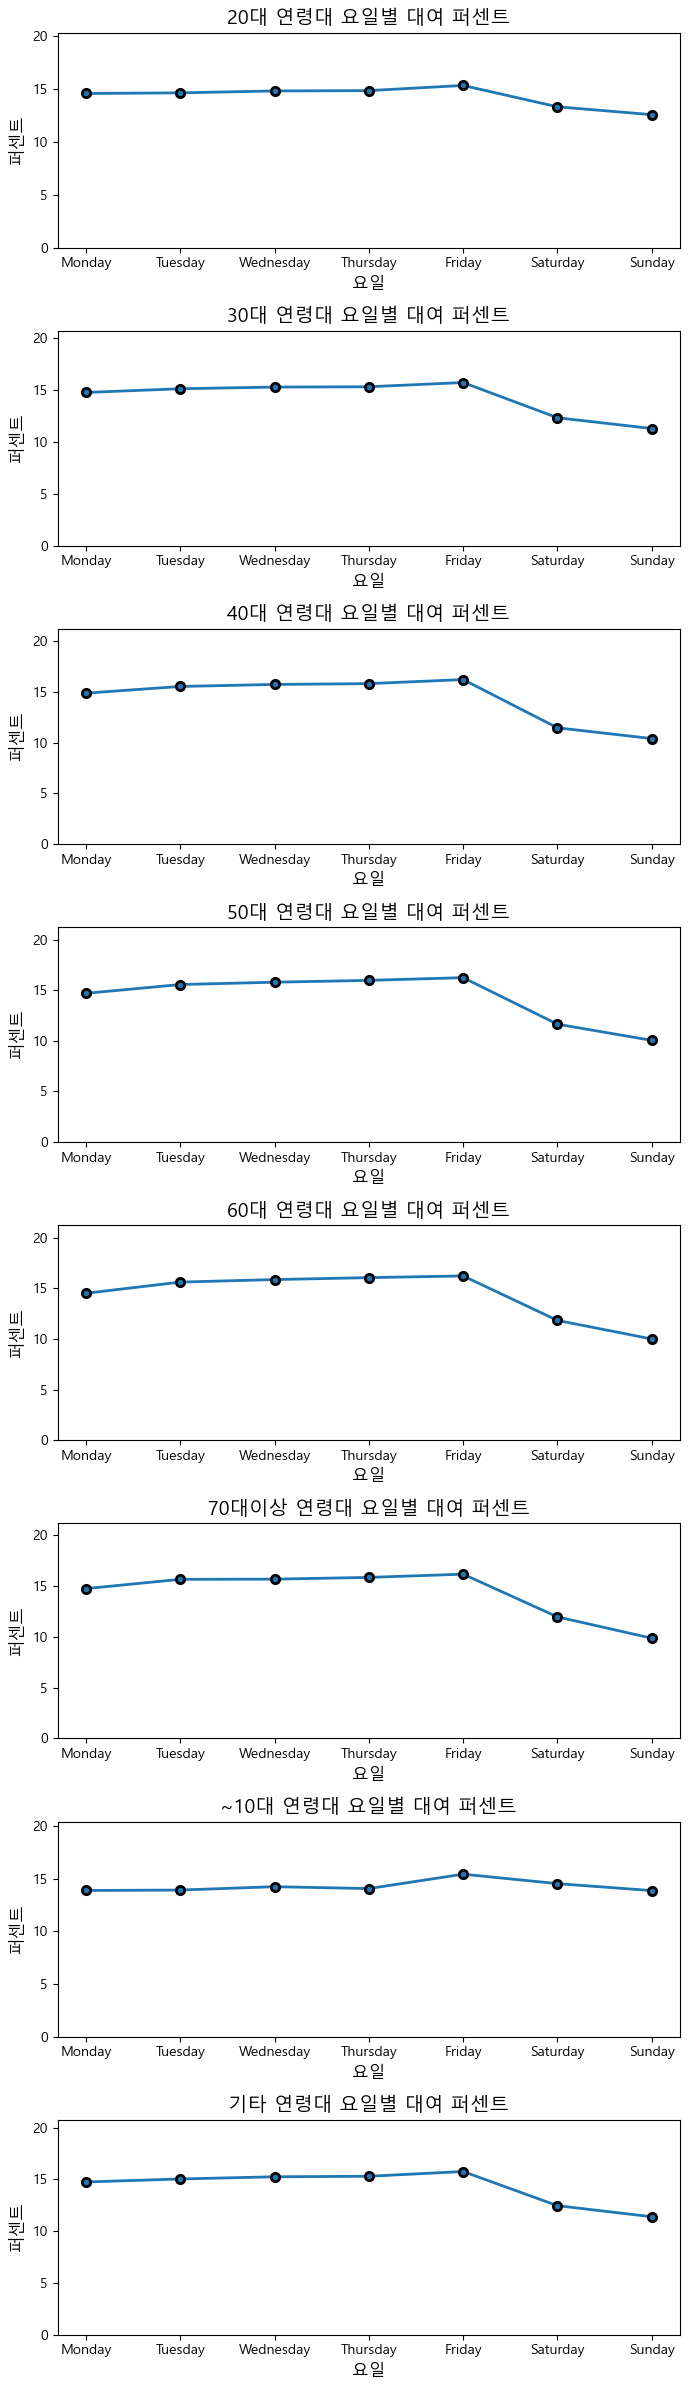

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'Nanum Gothic'

unique_age_groups = date_group_counts_sorted['연령대코드'].unique()

fig, axes = plt.subplots(len(unique_age_groups), 1, figsize=(7, 3 * len(unique_age_groups)))

for i, age_group in enumerate(unique_age_groups):
    ax = axes[i]
    group_data = date_group_counts_sorted[date_group_counts_sorted['연령대코드'] == age_group]
    
    sns.lineplot(x='요일', y='퍼센트', data=group_data, marker='o', linewidth=2, markersize=6, markeredgewidth=2, markeredgecolor='black', ax=ax)
    
    ax.set_title(f'{age_group} 연령대 요일별 대여 퍼센트', fontsize=14)
    ax.set_xlabel('요일', fontsize=12)
    ax.set_ylabel('퍼센트', fontsize=12)

    ax.set_xticks(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    ax.set_ylim(0, group_data['퍼센트'].max() + 5)  # 퍼센트의 최대값을 기준으로 조금 여유를 두기

plt.tight_layout()
plt.show()



In [24]:
# 연령대별 대여소명7
pla_group_counts = df.groupby(['연령대코드', '대여소명']).size().reset_index(name='빈도수')

# 각 연령대코드별로 전체 빈도수 계산
pla_group_counts['연령대별총합'] = pla_group_counts.groupby('연령대코드')['빈도수'].transform('sum')

pla_group_counts['퍼센트'] = ((pla_group_counts['빈도수'] / pla_group_counts['연령대별총합']) * 100).round(2)

# '연령대별총합' 열은 퍼센트 계산 후 필요 없으니 제거 (선택사항)
pla_group_counts = pla_group_counts.drop(columns='연령대별총합')

print(pla_group_counts)

      연령대코드                       대여소명   빈도수   퍼센트
0       20대  1001. 광진교 남단 사거리(천호공원 방면)  5254  0.05
1       20대            1002. 해공공원(천호동)  6879  0.06
2       20대               1003. 해공도서관앞  3411  0.03
3       20대       1004. 삼성광나루아파트 버스정류장  4911  0.05
4       20대           1006. 롯데캐슬 115동앞   773  0.01
...     ...                        ...   ...   ...
22907    기타              992.북한산입구 정류장   246  0.01
22908    기타          993.은평뉴타운 은뜨락아파트앞   508  0.02
22909    기타         994.북한산생태공원입구(교통섬)   128  0.00
22910    기타               995.은평다목적체육관   362  0.01
22911    기타         996.응암역2번출구 국민은행 앞  3287  0.11

[22912 rows x 4 columns]


In [25]:
pla_result = pd.DataFrame()

for pla_group in pla_group_counts['연령대코드'].unique():
    pla_top_3 = pla_group_counts[pla_group_counts['연령대코드'] == pla_group].nlargest(1, '빈도수')
    pla_result = pd.concat([pla_result, pla_top_3])

pla_result.reset_index(drop=True, inplace=True)

print(pla_result)

   연령대코드                     대여소명    빈도수   퍼센트
0    20대            2102. 봉림교 교통섬  27229  0.26
1    30대        2715.마곡나루역 2번 출구   27915  0.30
2    40대        2715.마곡나루역 2번 출구   16483  0.27
3    50대        2715.마곡나루역 2번 출구   10176  0.24
4    60대          583. 청계천 생태교실 앞   4349  0.29
5  70대이상  1063.강동롯데캐슬퍼스트 아파트(관리동)   1534  0.64
6   ~10대            746. 목동2단지 상가  12591  0.45
7     기타        2715.마곡나루역 2번 출구   11207  0.36


In [26]:
# 연령대별 자치구8
gu_group_counts = df.groupby(['연령대코드', '자치구']).size().reset_index(name='빈도수')

# 각 연령대코드별로 전체 빈도수 계산
gu_group_counts['연령대별총합'] = gu_group_counts.groupby('연령대코드')['빈도수'].transform('sum')

gu_group_counts['퍼센트'] = ((gu_group_counts['빈도수'] / gu_group_counts['연령대별총합']) * 100).round(2)

# '연령대별총합' 열은 퍼센트 계산 후 필요 없으니 제거 (선택사항)
gu_group_counts = gu_group_counts.drop(columns='연령대별총합')

print(gu_group_counts)


    연령대코드  자치구      빈도수   퍼센트
0     20대  강남구   316828  2.99
1     20대  강동구   439611  4.14
2     20대  강북구   174611  1.65
3     20대  강서구  1016080  9.58
4     20대  관악구   335665  3.16
..    ...  ...      ...   ...
195    기타  용산구    59542  1.91
196    기타  은평구    73234  2.34
197    기타  종로구    99432  3.18
198    기타   중구    68469  2.19
199    기타  중랑구    96927  3.10

[200 rows x 4 columns]


In [27]:
gu_result = pd.DataFrame()

for gu_group in gu_group_counts['연령대코드'].unique():
    gu_top_3 = gu_group_counts[gu_group_counts['연령대코드'] == gu_group].nlargest(2, '빈도수')
    gu_result = pd.concat([gu_result, gu_top_3])

gu_result.reset_index(drop=True, inplace=True)

print(gu_result)

    연령대코드  자치구      빈도수    퍼센트
0     20대  강서구  1016080   9.58
1     20대  송파구   907419   8.55
2     30대  강서구  1038489  11.30
3     30대  송파구   915996   9.96
4     40대  강서구   690212  11.34
5     40대  송파구   551693   9.06
6     50대  강서구   437544  10.13
7     50대  송파구   362760   8.40
8     60대  강서구   148700  10.01
9     60대  송파구   132355   8.91
10  70대이상  강서구    23340   9.81
11  70대이상  송파구    20425   8.59
12   ~10대  양천구   396176  14.00
13   ~10대  강서구   394632  13.95
14     기타  강서구   392773  12.57
15     기타  송파구   277472   8.88


In [28]:
gu_result = pd.DataFrame()

for gu_group in gu_group_counts['연령대코드'].unique():
    gu_top_3 = gu_group_counts[gu_group_counts['연령대코드'] == gu_group].nsmallest(2, '빈도수')
    gu_result = pd.concat([gu_result, gu_top_3])

gu_result.reset_index(drop=True, inplace=True)

print(gu_result)

    연령대코드   자치구     빈도수   퍼센트
0     20대   강북구  174611  1.65
1     20대   금천구  193260  1.82
2     30대   강북구  113175  1.23
3     30대   도봉구  163583  1.78
4     40대   강북구   85596  1.41
5     40대   관악구  106395  1.75
6     50대   금천구   65048  1.51
7     50대   관악구   77767  1.80
8     60대   금천구   18888  1.27
9     60대   동작구   25362  1.71
10  70대이상  서대문구    4304  1.81
11  70대이상   강북구    4580  1.93
12   ~10대   금천구   17438  0.62
13   ~10대    중구   20263  0.72
14     기타   강북구   45109  1.44
15     기타   금천구   52236  1.67
